In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,StackingRegressor


In [2]:
df=pd.read_csv('Regression_StoreSales.csv') #loading the data
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


### Data Preprocessing

In [3]:
df.shape  #shape of data

(14204, 12)

In [4]:
df.columns #column names

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.info() #data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()  #missing values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

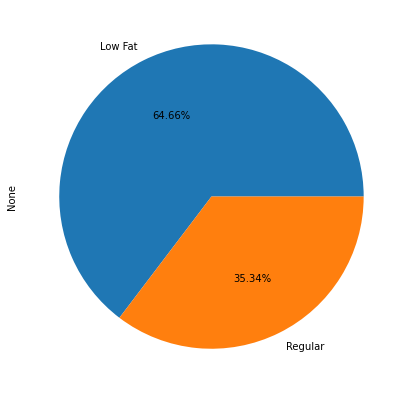

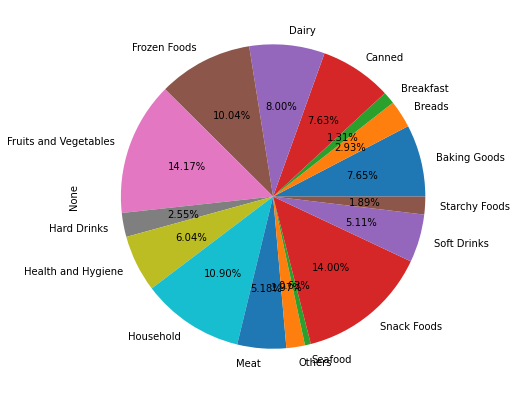

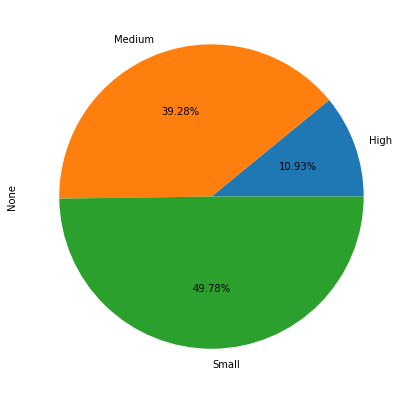

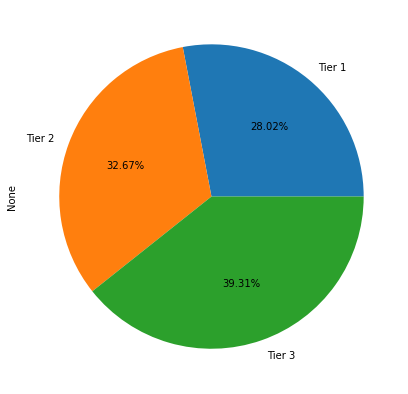

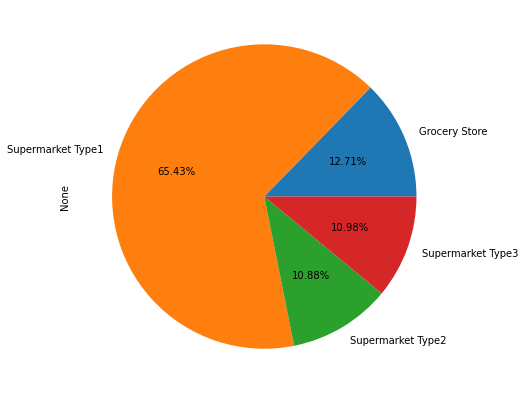

In [7]:
cat=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in cat:
    plt.figure(figsize=(20,7))
    df.groupby(i).size().plot(kind='pie',autopct='%0.2f%%')

[ 992. 1808. 1736. 1412. 1507. 1232. 1543. 1444. 1312. 1218.]
[1519.  953. 1745. 2140. 1322. 1816. 2009.  783.  966.  951.]


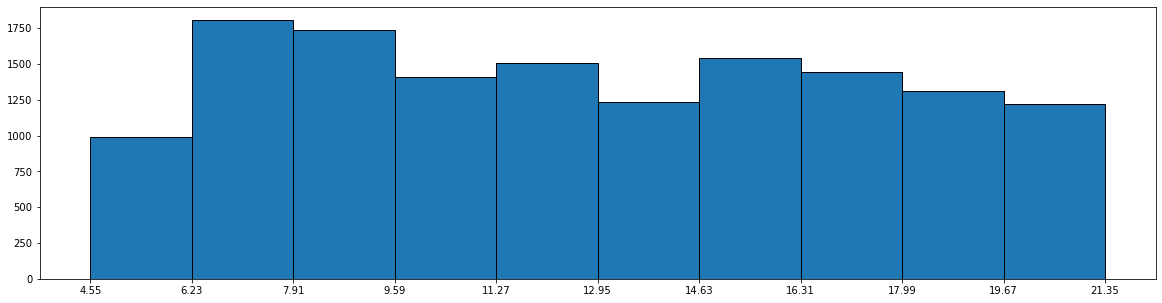

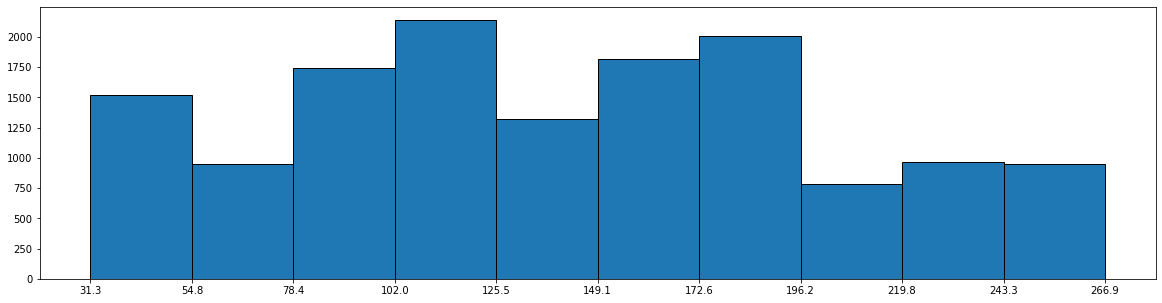

In [8]:
num=['Item_Weight','Item_MRP']
for i in num:
    plt.figure(figsize=(20,5))
    n,bins,patches=plt.hist(df[i],edgecolor='black');
    plt.xticks(bins);
    print(n)
    

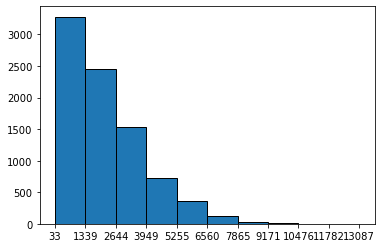

In [9]:
n,bins,patches=plt.hist(df['Item_Outlet_Sales'],edgecolor='black');  #Distribution before missing value treatment
plt.xticks(bins);

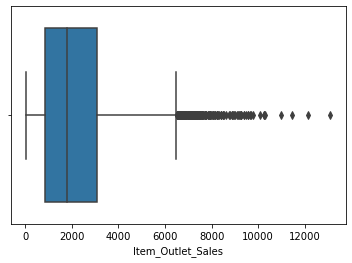

In [10]:
sns.boxplot(df['Item_Outlet_Sales']);

In [11]:
df1=df.copy()

In [12]:
df1['Item_Outlet_Sales']=df1['Item_Outlet_Sales'].fillna(df1['Item_Outlet_Sales'].median())

In [13]:
df1['Item_Outlet_Sales'].median()

1794.331

[3.280e+03 8.129e+03 1.527e+03 7.290e+02 3.590e+02 1.240e+02 3.600e+01
 1.600e+01 2.000e+00 2.000e+00]


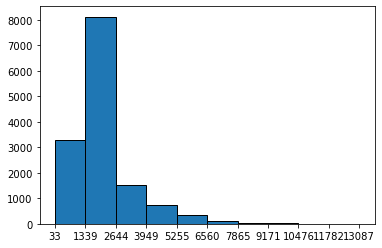

In [14]:
n,bins,patches=plt.hist(df1['Item_Outlet_Sales'],edgecolor='black');  #Distribution after missing value treatment
plt.xticks(bins);
print(n)

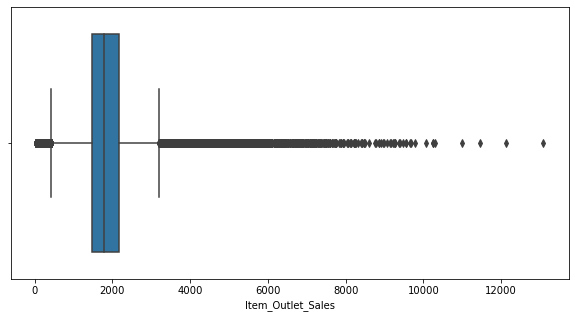

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(df1['Item_Outlet_Sales']);

In [16]:
from sklearn.impute import KNNImputer
i_knn=KNNImputer(n_neighbors=2)

In [17]:
a=np.array(df['Item_Outlet_Sales']).reshape(-1,1)

In [18]:
b=i_knn.fit_transform(a)

In [19]:
b

array([[3735.138     ],
       [ 443.4228    ],
       [2097.27      ],
       ...,
       [2181.28891358],
       [2181.28891358],
       [2181.28891358]])

[3.280e+03 8.129e+03 1.527e+03 7.290e+02 3.590e+02 1.240e+02 3.600e+01
 1.600e+01 2.000e+00 2.000e+00]


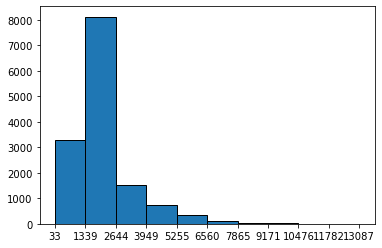

In [20]:
n,bins,patches=plt.hist(b,edgecolor='black');
plt.xticks(bins);
print(n)

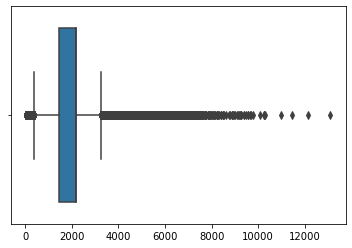

In [21]:
sns.boxplot(b);

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
ii = IterativeImputer()
ii.fit_transform(a)

array([[3735.138     ],
       [ 443.4228    ],
       [2097.27      ],
       ...,
       [2181.28891358],
       [2181.28891358],
       [2181.28891358]])

### Feature engineering

In [23]:
df1.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [24]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.064299,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
14199,10.50,Regular,0.013496,Snack Foods,141.3154,Small,Tier 1,Supermarket Type1,1794.3310
14200,7.60,Regular,0.142991,Starchy Foods,169.1448,Medium,Tier 3,Supermarket Type2,1794.3310
14201,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,Small,Tier 2,Supermarket Type1,1794.3310
14202,15.30,Regular,0.064709,Canned,214.6218,Small,Tier 2,Supermarket Type1,1794.3310


In [25]:
cat1=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
encoder=preprocessing.LabelEncoder()
for i in cat1:
    df1[i]=encoder.fit_transform(df1[i])
    
df1
    
    

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.074402,6,182.0950,1,2,0,732.3800
4,8.93,0,0.064299,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
14199,10.50,1,0.013496,13,141.3154,2,0,1,1794.3310
14200,7.60,1,0.142991,15,169.1448,1,2,2,1794.3310
14201,10.00,0,0.073529,8,118.7440,2,1,1,1794.3310
14202,15.30,1,0.064709,3,214.6218,2,1,1,1794.3310


In [26]:
scaler=preprocessing.StandardScaler()
df_sd=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df_sd.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.751014,-0.739212,-1.115880,-0.766467,1.752511,-0.575144,-1.369286,-0.252702,1.279534
1,-1.477653,1.352792,-1.049426,1.606957,-1.493696,-0.575144,1.091566,1.002766,-1.185539
2,1.011839,-0.739212,-1.101219,0.657587,0.009874,-0.575144,-1.369286,-0.252702,0.052981
3,1.377308,1.352792,0.084363,-0.291782,0.661838,-0.575144,1.091566,-1.508171,-0.969147
4,-0.830557,-0.739212,-0.123442,0.420245,-1.403623,-2.055636,1.091566,-0.252702,-0.772699


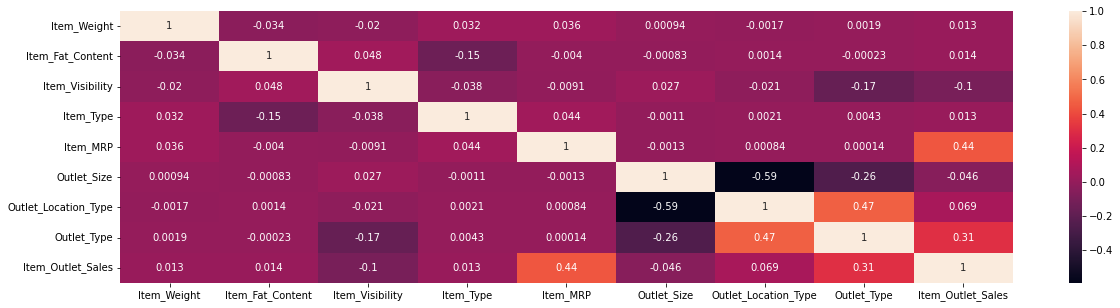

In [27]:
plt.figure(figsize=(20,5))
sns.heatmap(df_sd.corr(),annot=True);

In [28]:
x=df_sd.iloc[:,0:8]
y=df_sd['Item_Outlet_Sales']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
#Linear Regression

In [31]:
lr=LinearRegression()
lr

LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
lr.score(x_train,y_train)

0.29613467487941214

In [34]:
yp=lr.predict(x_test)

In [35]:
mse=mean_squared_error(yp,y_test)
mae=mean_absolute_error(yp,y_test)
print('Mean Squared Error:',round(mse,4))
print('Mean Absolute Error:',round(mae,4))

Mean Squared Error: 0.6922
Mean Absolute Error: 0.6107


In [36]:
#decision tree

In [37]:
dtr=DecisionTreeRegressor(max_depth=4)

In [38]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [39]:
dtr.score(x_train,y_train)

0.344555410676081

In [40]:
kf=KFold(n_splits=4)

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
dtmse=cross_val_score(dtr,x,y,cv=kf,scoring='neg_mean_squared_error')
print('Mean Squared Error of DTR:',abs(dtmse.mean()))

Mean Squared Error of DTR: 0.8082473353743419


In [43]:
dtmae=cross_val_score(dtr,x,y,cv=kf,scoring='neg_mean_absolute_error')
print('Mean Absolute Error of DTR:',abs(dtmae.mean()))

Mean Absolute Error of DTR: 0.6691964989081689


In [44]:
#ada boost

In [45]:
ad=AdaBoostRegressor(n_estimators=50)

In [46]:
ad.fit(x_train,y_train)

AdaBoostRegressor()

In [47]:
ad.score(x_train,y_train)

0.1920980137467878

In [48]:
admse=cross_val_score(ad,x,y,cv=kf,scoring='neg_mean_squared_error')
print('Mean Squared Error of AdaBoost:',abs(admse.mean()))

Mean Squared Error of AdaBoost: 0.8552686531237677


In [49]:
admae=cross_val_score(ad,x,y,cv=kf,scoring='neg_mean_absolute_error')
print('Mean Absolute Error of AdaBoost:',abs(admae.mean()))

Mean Absolute Error of AdaBoost: 0.758659181864704


In [50]:
#stacking

In [51]:
def stack():
    base=[]
    base.append(('Kn',KNeighborsRegressor()))
    base.append(('dtr',DecisionTreeRegressor()))
    base.append(('svm',SVR()))
    
    meta=LinearRegression()
    st=StackingRegressor(estimators=base,final_estimator=meta,cv=4)
    return st

In [52]:
stacking=stack()

In [53]:
stacking

StackingRegressor(cv=4,
                  estimators=[('Kn', KNeighborsRegressor()),
                              ('dtr', DecisionTreeRegressor()),
                              ('svm', SVR())],
                  final_estimator=LinearRegression())

In [54]:
stacking.fit(x_train,y_train)

StackingRegressor(cv=4,
                  estimators=[('Kn', KNeighborsRegressor()),
                              ('dtr', DecisionTreeRegressor()),
                              ('svm', SVR())],
                  final_estimator=LinearRegression())

In [55]:
stacking.score(x_train,y_train)

0.47253652879870645

In [56]:
stmse=cross_val_score(stacking,x,y,cv=kf,scoring='neg_mean_squared_error')
print('Mean Squared Error of Stacking:',abs(stmse.mean()))

Mean Squared Error of Stacking: 0.9490104205320715


In [57]:
stmae=cross_val_score(stacking,x,y,cv=kf,scoring='neg_mean_absolute_error')
print('Mean Absolute Error of Stacking:',abs(stmae.mean()))

Mean Absolute Error of Stacking: 0.7151056034699571


### Interpretation:

In [58]:
dict={'Model':['Linear Regression','Decision Tree Regressor','Ada Boost','Stacking'],'Training performance':[0.296,0.344,0.221,0.464],'Mse':[mse,abs(dtmse.mean()),abs(admse.mean()),abs(stmse.mean())],'Mae':[mae,abs(dtmae.mean()),abs(admae.mean()),abs(stmae.mean())]}
compare=pd.DataFrame(dict)
compare

,Model,Training performance,Mse,Mae
0,Linear Regression,0.296,0.692167,0.610735
1,Decision Tree Regressor,0.344,0.808247,0.669196
2,Ada Boost,0.221,0.855269,0.758659
3,Stacking,0.464,0.949010,0.715106


there is huge bias in the target column

underfitting problem is present as the training performance is very low

So used ensemble techniques to control that

stacking has better performance out of all

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_test,yp)

0.29043951988184136

In [64]:
ypp=dtr.predict(x_test)

In [65]:
r2_score(y_test,ypp)

0.34711495820816607